# Vancouver Transit Exploration Task
## CMPT 353 Final Project
### Jason Cai, Rebekah Wong (Group: "Mute Jammers")

In [1]:
# Geopandas: same as pandas, but better suited for geographic data (i.e. 'geometry' column to plot out map of Vancouver)
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

## Introduction: looking at transit data as is

In [2]:
# Read transit data from directory
# https://doi.org/10.25314/5e94d820-678e-4d3a-9a97-51fb730d5cf5
transit = gpd.read_file("data/transit.zip")

transit

,id,geo_uid,csdname,csdtype,policy_yea,transit_qu,geometry
0,161755,59150307,Vancouver,CY,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1,161756,59150308,Vancouver,CY,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
2,161757,59150309,Vancouver,CY,2010,125.565256,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
3,161758,59150310,Vancouver,CY,2010,246.654575,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
4,161759,59150311,Vancouver,CY,2010,150.230499,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...,...,...
7931,169686,59153996,Vancouver,CY,2040,2788.322613,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
7932,169687,59153997,Vancouver,CY,2040,2441.398929,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
7933,169688,59154000,Vancouver,CY,2040,1559.674322,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
7934,169689,59154001,Vancouver,CY,2040,3214.729398,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [3]:
# Rename columns for clarity
transit = transit.rename(columns={'csdname':'city', 'policy_yea':'year', 'transit_qu':'transit_quality'})

# Only keep necessary columns for analysis
# geo_uid: unique identifier for region (inferred because items with same geo_uid have same geometry/shape)
transit = transit[['geo_uid', 'city', 'year', 'transit_quality', 'geometry']]

# Need to use "|" instead of Python "or" to prevent ambiguity error - https://stackoverflow.com/q/36921951
transit = transit[(transit['year'] == 2010) | (transit['year'] == 2015) | (transit['year'] == 2020)]

transit

,geo_uid,city,year,transit_quality,geometry
0,59150307,Vancouver,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1,59150308,Vancouver,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
2,59150309,Vancouver,2010,125.565256,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
3,59150310,Vancouver,2010,246.654575,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
4,59150311,Vancouver,2010,150.230499,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...
5947,59153996,Vancouver,2020,1795.115966,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
5948,59153997,Vancouver,2020,1819.825217,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
5949,59154000,Vancouver,2020,1001.975525,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
5950,59154001,Vancouver,2020,2782.914647,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


<AxesSubplot:>

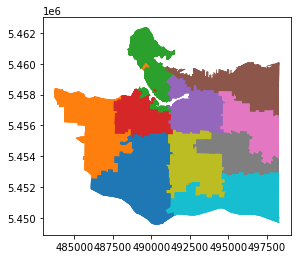

In [4]:
# Plot map of Vancouver based on geometry shapes in data
transit.plot(column='geometry')

<AxesSubplot:>

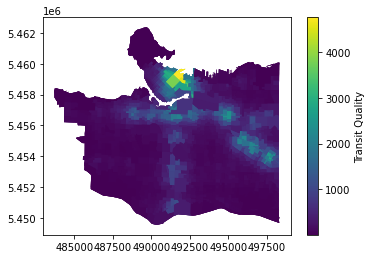

In [5]:
# Transit quality needs cleaning! Graph does not look very informative as is :(
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
transit.plot(column='transit_quality', legend=True, legend_kwds={'label':'Transit Quality'})

In [6]:
# Preliminary work: Print data as is, prior to any cleaning/analysis
# Sort transit quality from highest score to lowest
transit.sort_values(by='transit_quality', ascending=False)

,geo_uid,city,year,transit_quality,geometry
5840,59153466,Vancouver,2020,4765.249599,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
2864,59153466,Vancouver,2020,4549.568024,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
5872,59153584,Vancouver,2020,4509.035780,"POLYGON ((492085.822 5459067.742, 492071.152 5..."
1872,59153466,Vancouver,2015,4457.191718,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
880,59153466,Vancouver,2010,4420.839584,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
...,...,...,...,...,...
517,59150919,Vancouver,2010,1.160075,"POLYGON ((485911.931 5455587.268, 485910.903 5..."
5493,59150953,Vancouver,2020,0.693054,"POLYGON ((486989.341 5453053.085, 487006.918 5..."
2517,59150953,Vancouver,2020,0.568181,"POLYGON ((486989.341 5453053.085, 487006.918 5..."
1525,59150953,Vancouver,2015,0.551531,"POLYGON ((486989.341 5453053.085, 487006.918 5..."


In [7]:
transit['transit_quality'].min()

0.545307569824622

In [8]:
transit['transit_quality'].max()

4765.24959913149

In [9]:
transit['transit_quality'].mean()

446.5466410165331

In [10]:
transit['transit_quality'].median()

204.591990221745

(array([2789.,  590.,  312.,  157.,   67.,   33.,    7.,    5.,    3.,
           5.]),
 array([5.45307570e-01, 4.77015737e+02, 9.53486166e+02, 1.42995660e+03,
        1.90642702e+03, 2.38289745e+03, 2.85936788e+03, 3.33583831e+03,
        3.81230874e+03, 4.28877917e+03, 4.76524960e+03]),
 <BarContainer object of 10 artists>)

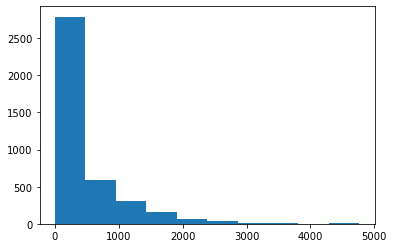

In [11]:
# Notice how the data is heavily right-skewed - fix by sqrt or log
plt.hist(transit['transit_quality'])

## Data Cleaning: Modifying skewed data

In [12]:
# Square root all transit quality values
transit['sqrt'] = transit['transit_quality']**0.5

# Next possible fix: apply log to all transit quality values
transit['log'] = np.log(transit['transit_quality'])

transit

,geo_uid,city,year,transit_quality,geometry,sqrt,log
0,59150307,Vancouver,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5...",2.496467,1.829753
1,59150308,Vancouver,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5...",9.291451,4.458190
2,59150309,Vancouver,2010,125.565256,"POLYGON ((497940.841 5459213.445, 497940.812 5...",11.205590,4.832826
3,59150310,Vancouver,2010,246.654575,"POLYGON ((498298.679 5458709.775, 498298.646 5...",15.705240,5.507989
4,59150311,Vancouver,2010,150.230499,"POLYGON ((497939.463 5458606.665, 498128.359 5...",12.256855,5.012171
...,...,...,...,...,...,...,...
5947,59153996,Vancouver,2020,1795.115966,"POLYGON ((491123.035 5459615.245, 491120.710 5...",42.368809,7.492825
5948,59153997,Vancouver,2020,1819.825217,"POLYGON ((491676.840 5459587.193, 491605.386 5...",42.659409,7.506496
5949,59154000,Vancouver,2020,1001.975525,"POLYGON ((492570.830 5458268.003, 492570.838 5...",31.653997,6.909729
5950,59154001,Vancouver,2020,2782.914647,"POLYGON ((492175.437 5458706.854, 492275.116 5...",52.753338,7.931254


(array([ 580., 1420.,  732.,  458.,  391.,  224.,  109.,   38.,    8.,
           8.]),
 array([ 0.73844944,  7.56768323, 14.39691701, 21.2261508 , 28.05538459,
        34.88461838, 41.71385217, 48.54308596, 55.37231975, 62.20155354,
        69.03078733]),
 <BarContainer object of 10 artists>)

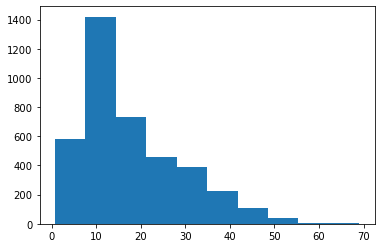

In [13]:
plt.hist(transit['sqrt'])

<AxesSubplot:>

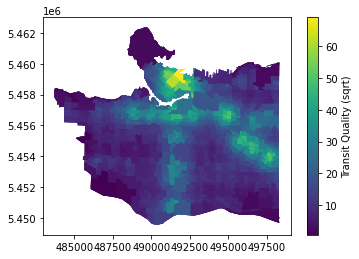

In [14]:
transit.plot(column='sqrt', legend=True, legend_kwds={'label':'Transit Quality (sqrt)'})

In [15]:
transit['sqrt'].min()

0.7384494362003549

In [16]:
transit['sqrt'].max()

69.0307873280574

In [17]:
transit['sqrt'].mean()

17.84035248958655

In [18]:
transit['sqrt'].median()

14.303564608856

(array([   7.,   13.,   26.,   86.,  335., 1027.,  900.,  781.,  677.,
         116.]),
 array([-0.6064053 ,  0.30114575,  1.2086968 ,  2.11624785,  3.0237989 ,
         3.93134995,  4.838901  ,  5.74645205,  6.6540031 ,  7.56155415,
         8.4691052 ]),
 <BarContainer object of 10 artists>)

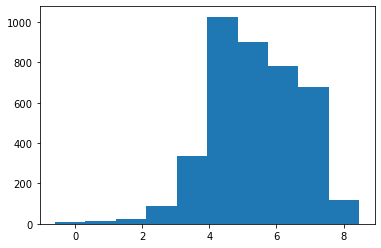

In [19]:
# Next possible fix: apply log to all transit quality values
plt.hist(transit['log'])

<AxesSubplot:>

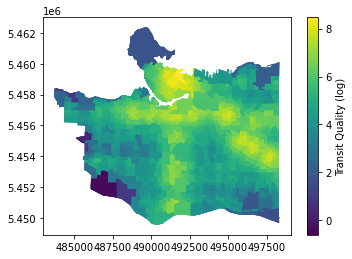

In [20]:
transit.plot(column='log', legend=True, legend_kwds={'label':'Transit Quality (log)'})

In [21]:
transit['log'].min()

-0.6064052952014497

In [22]:
transit['log'].max()

8.469105196485888

In [23]:
transit['log'].mean()

5.357822267444569

In [24]:
transit['log'].median()

5.32101741392108

## Final Scores: log(transit_quality) + 1

In [25]:
# Based on the min/max results above, we could further add 1 to each value so that the numbers fit neatly into a 0 to 10 range
transit['quality_score'] = transit['log'] + 1

In [26]:
# Keep relevant columns after scaling skewed data
transit = transit[['geo_uid', 'city', 'year', 'quality_score', 'geometry']]

In [27]:
transit['quality_score'].min()

0.3935947047985503

In [28]:
transit['quality_score'].max()

9.469105196485888

In [29]:
transit['quality_score'].mean()

6.357822267444574

In [30]:
transit['quality_score'].median()

6.32101741392108

## Aggregating to find average transit quality over time

In [31]:
# Determine which regions of Vancouver tend to score higher in transit quality
# Multiple entries per geo_uid represent different quality scores over years in data
transit_quality = transit.groupby('geo_uid').agg({'quality_score' : 'mean'}).sort_values(by='quality_score')

# Process dataframes more to leave only quality and area of Vancouver for comparisons
transit_quality = transit_quality.reset_index()

transit_quality

,geo_uid,quality_score
0,59150953,0.466644
1,59150919,1.215100
2,59150932,1.727413
3,59150983,1.839724
4,59150915,1.878309
...,...,...
987,59153168,8.968347
988,59153583,9.070947
989,59153845,9.194106
990,59153584,9.360151


In [32]:
# Extract dataframe with only list of geometry shapes to append to aggregated dataframe above
geometry = transit.drop_duplicates(subset='geometry')

# Match the geographic region back to its score based on geo_uid
transit_agg = geometry[['geo_uid', 'geometry']].merge(transit_quality, on=['geo_uid'])

transit_agg

,geo_uid,geometry,quality_score
0,59150307,"POLYGON ((498310.190 5459815.920, 498309.638 5...",2.856574
1,59150308,"POLYGON ((498303.642 5459212.268, 498303.155 5...",5.510685
2,59150309,"POLYGON ((497940.841 5459213.445, 497940.812 5...",5.891830
3,59150310,"POLYGON ((498298.679 5458709.775, 498298.646 5...",6.565582
4,59150311,"POLYGON ((497939.463 5458606.665, 498128.359 5...",6.069549
...,...,...,...
987,59153996,"POLYGON ((491123.035 5459615.245, 491120.710 5...",8.442239
988,59153997,"POLYGON ((491676.840 5459587.193, 491605.386 5...",8.459761
989,59154000,"POLYGON ((492570.830 5458268.003, 492570.838 5...",7.863696
990,59154001,"POLYGON ((492175.437 5458706.854, 492275.116 5...",8.882093


Text(0.5, 1.0, "Map of Vancouver's Transit Quality")

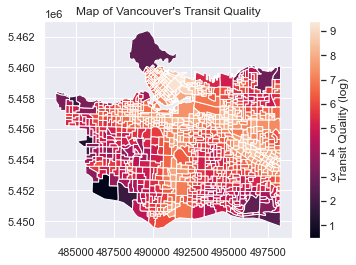

In [33]:
# Try graphing with seaborn for more detailed map
import seaborn
seaborn.set()

# Use 'set_title' function to add title to graph
# https://stackoverflow.com/q/75607179
transit_agg.plot(column='quality_score', legend=True, legend_kwds={'label':'Transit Quality (log)'}) \
            .set_title('Map of Vancouver\'s Transit Quality')

## Visual comparisons of transit quality scores from 2010, 2015 & 2020

In [34]:
# Data range: 2010, 2015, 2020
# Extract relevant years into separate dataframes
transit_2010 = transit[transit['year'] == 2010]
transit_2010

,geo_uid,city,year,quality_score,geometry
0,59150307,Vancouver,2010,2.829753,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1,59150308,Vancouver,2010,5.458190,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
2,59150309,Vancouver,2010,5.832826,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
3,59150310,Vancouver,2010,6.507989,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
4,59150311,Vancouver,2010,6.012171,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...
987,59153996,Vancouver,2010,8.413423,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
988,59153997,Vancouver,2010,8.432154,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
989,59154000,Vancouver,2010,7.836553,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
990,59154001,Vancouver,2010,8.853501,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [35]:
transit_2010['quality_score'].mean()

6.196180441857331

In [36]:
transit_2010['quality_score'].median()

6.100901030556049

Text(0.5, 1.0, "2010 Map of Vancouver's Transit Quality")

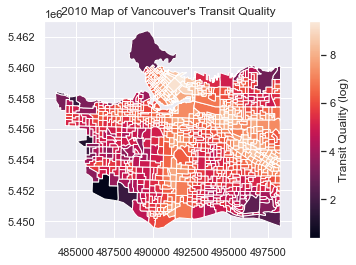

In [37]:
transit_2010.plot(column='quality_score', legend=True, legend_kwds={'label':'Transit Quality (log)'}) \
            .set_title('2010 Map of Vancouver\'s Transit Quality')

In [38]:
transit_2015 = transit[transit['year'] == 2015]
transit_2015

,geo_uid,city,year,quality_score,geometry
992,59150307,Vancouver,2015,2.830236,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
993,59150308,Vancouver,2015,5.458358,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
994,59150309,Vancouver,2015,5.832944,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
995,59150310,Vancouver,2015,6.508120,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
996,59150311,Vancouver,2015,6.012399,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...
1979,59153996,Vancouver,2015,8.420976,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
1980,59153997,Vancouver,2015,8.440356,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
1981,59154000,Vancouver,2015,7.844865,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
1982,59154001,Vancouver,2015,8.861268,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [39]:
transit_2015['quality_score'].mean()

6.370723077134794

In [40]:
transit_2015['quality_score'].median()

6.363215353497588

Text(0.5, 1.0, "2015 Map of Vancouver's Transit Quality")

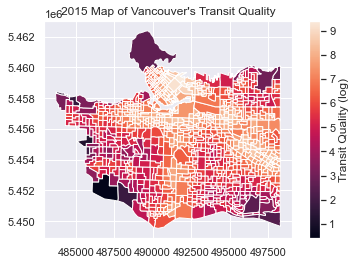

In [41]:
transit_2015.plot(column='quality_score', legend=True, legend_kwds={'label':'Transit Quality (log)'}) \
            .set_title('2015 Map of Vancouver\'s Transit Quality')

In [42]:
transit_2020 = transit[transit['year'] == 2020]
transit_2020

,geo_uid,city,year,quality_score,geometry
1984,59150307,Vancouver,2020,2.850788,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1985,59150308,Vancouver,2020,5.500227,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
1986,59150309,Vancouver,2020,5.879355,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
1987,59150310,Vancouver,2020,6.553959,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
1988,59150311,Vancouver,2020,6.058400,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...
5947,59153996,Vancouver,2020,8.492825,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
5948,59153997,Vancouver,2020,8.506496,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
5949,59154000,Vancouver,2020,7.909729,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
5950,59154001,Vancouver,2020,8.931254,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [43]:
transit_2020['quality_score'].mean()

6.432192775393023

In [44]:
transit_2020['quality_score'].median()

6.437642790576171

Text(0.5, 1.0, "2020 Map of Vancouver's Transit Quality")

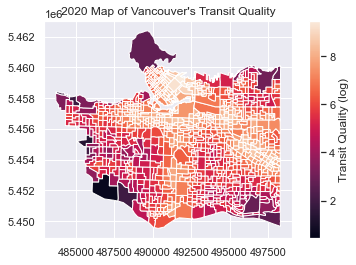

In [45]:
transit_2020.plot(column='quality_score', legend=True, legend_kwds={'label':'Transit Quality (log)'}) \
            .set_title('2020 Map of Vancouver\'s Transit Quality')

In [46]:
# Work in progress: need to append neighbourhood to transit data above
# https://opendata.vancouver.ca/explore/dataset/local-area-boundary/information/
neighbourhood = gpd.read_file("data/local-area-boundary.zip")

In [47]:
neighbourhood

,name,geometry
0,Downtown,"POLYGON ((-123.11227 49.29016, -123.10424 49.2..."
1,Hastings-Sunrise,"POLYGON ((-123.05649 49.29349, -123.05190 49.2..."
2,Kerrisdale,"POLYGON ((-123.17908 49.21556, -123.17870 49.2..."
3,Marpole,"POLYGON ((-123.10696 49.20416, -123.11153 49.2..."
4,Oakridge,"POLYGON ((-123.10562 49.23312, -123.10616 49.2..."
5,Riley Park,"POLYGON ((-123.10562 49.23312, -123.11617 49.2..."
6,South Cambie,"POLYGON ((-123.11599 49.23794, -123.11617 49.2..."
7,Shaughnessy,"POLYGON ((-123.15527 49.23452, -123.15508 49.2..."
8,Victoria-Fraserview,"POLYGON ((-123.05683 49.20420, -123.05846 49.2..."
9,Arbutus Ridge,"POLYGON ((-123.15260 49.25723, -123.15276 49.2..."
